About Dataset
Context
The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories

Content
This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

In [3]:
# Import Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Import Voting for regression
from sklearn.ensemble import VotingRegressor

# Import required functions and methods of Scikit-Learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Import other required functions and methods
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
# # Fetch data
# def fetchData():
#     try:
#         file_path = os.path.join('kaggle_data', 'Productivity_Prediction_of_Garment_Employees','garments_worker_productivity.csv')
#         df = pd.read_csv(file_path, header = 0, parse_dates = ['date'])
#         return df
    
#     except IOError:
#         print('File not found!')

# df = fetchData()    

In [5]:
file = 'garments_worker_productivity.csv'
df = pd.read_csv(file)

In [8]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Features information

date :                 Date in MM-DD-YYYY <br>
day :                  Day of the Week <br>
quarter :              A portion of the month. A month was divided into four quarters <br>
department :           Associated department with the instance <br>
team :               Associated team number with the instance <br>
no_of_workers :          Number of workers in each team <br>
no_of_stylechange :      Number of changes in the style of a particular product <br>
targeted_productivity : Targeted productivity set by the Authority for each team for each day. <br>
smv :                  Standard Minute Value, it is the allocated time for a task <br>
wip :                  Work in progress. Includes the number of unfinished items for products <br>
over_time :             Represents the amount of overtime by each team in minutes<br>
incentive :            Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action. <br>
idle_time :             The amount of time when the production was interrupted due to several reasons <br>
idle_men :              The number of workers who were idle due to production interruption <br>
actual_productivity :  The actual % of productivity that was delivered by the workers. It ranges from 0-1. <br>

## Data and features analysis

In [9]:
# Basic analysis 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

## feature: DATE

In [10]:
df['date'].min(), df['date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-03-11 00:00:00'))

Tracking of period between 1.1.2015 and 11.3.2015. As this is time series --> better to use date as index, so convert.

In [11]:
df.index = df['date']
df.drop(labels ='date', axis = 1, inplace = True)

In [12]:
df.head(1)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725


## feature: QUARTER

In [13]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

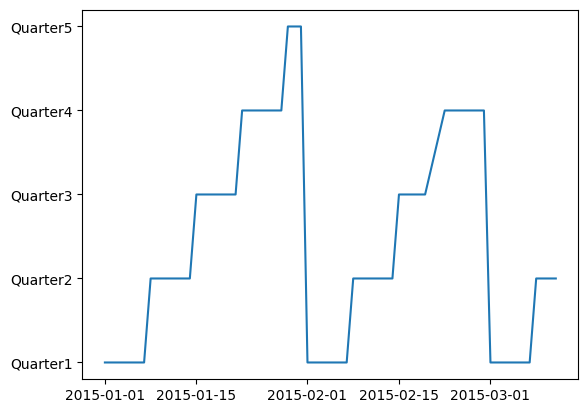

In [14]:
plt.plot(df.index, df['quarter'])

No special finding in Quarter feature. The lenght corresponds to the no. of days in the given month.

## feature: DEPARTMENT

In [15]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

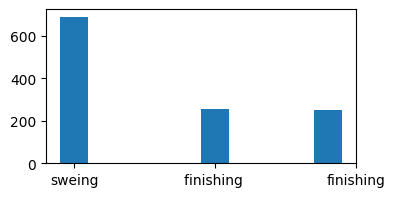

In [16]:
plt.figure(figsize=(4,2))
plt.hist(df['department'], align='left')
plt.show()

Not clear difference between "finishing" and "finishing " so better to check whether there is different technology used with process engineer (typo only, or the index is missing?) In order to simplify the model for now, merge the "finishing" simply by renaming. 

In [17]:
df['department'] = np.where(df['department'] != 'sweing', 'finishing','sewing')

In [18]:
df['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

## feature: DAY

In [19]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

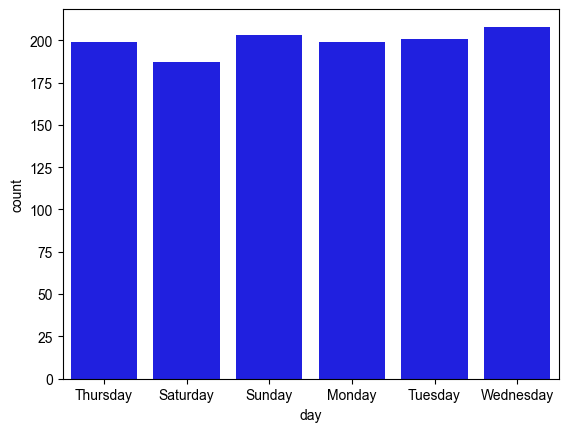

In [20]:
ax = sns.countplot(x=df['day'], color = 'blue')
sns.set(rc={'figure.figsize':(6,3)})

6 working days a week without Friday. 

## feature: TEAM

In [21]:
df['team'].value_counts().to_frame().sort_index()

,team
1,105
2,109
3,95
4,105
5,93
6,94
7,96
8,109
9,104
10,100


There are 12 teams alltogether.

<AxesSubplot:xlabel='team', ylabel='count'>

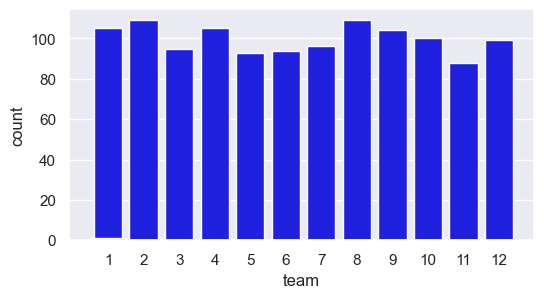

In [22]:
ax = sns.countplot(x=df['team'], color = 'blue')
sns.set(rc={'figure.figsize':(6,3)})
sns.histplot('No of team')

## feature: TARGETED PRODUCTIVITY, ACTUAL PRODUCTIVITY

In [23]:
df['targeted_productivity']

date
2015-01-01    0.80
2015-01-01    0.75
2015-01-01    0.80
2015-01-01    0.80
2015-01-01    0.80
              ... 
2015-03-11    0.75
2015-03-11    0.70
2015-03-11    0.65
2015-03-11    0.75
2015-03-11    0.70
Name: targeted_productivity, Length: 1197, dtype: float64

<AxesSubplot:xlabel='date', ylabel='targeted_productivity'>

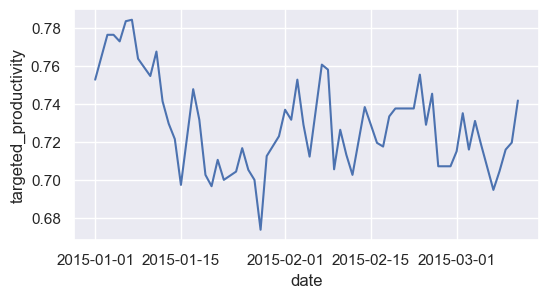

In [24]:
sns.lineplot(x = df.index, y=df['targeted_productivity'], errorbar=None)

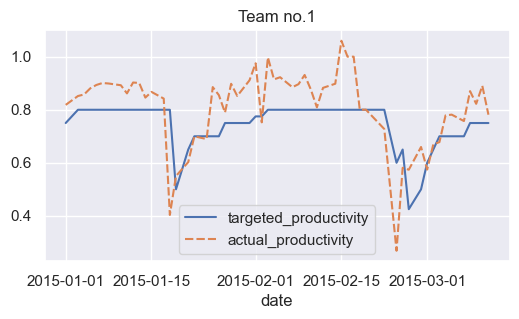

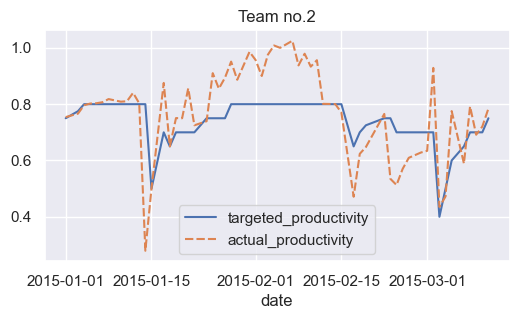

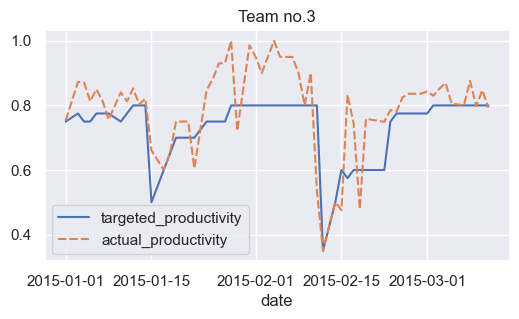

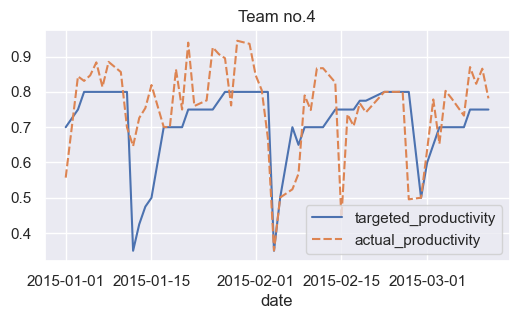

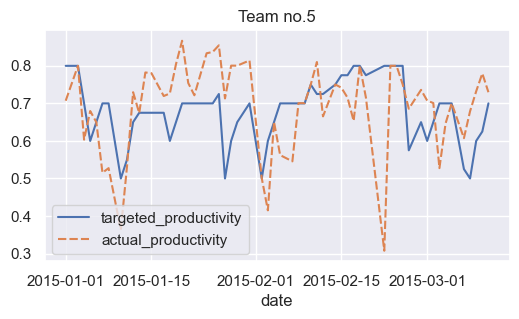

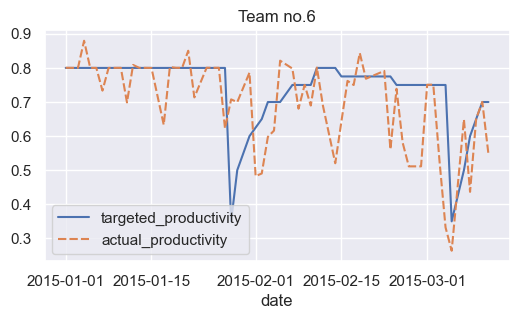

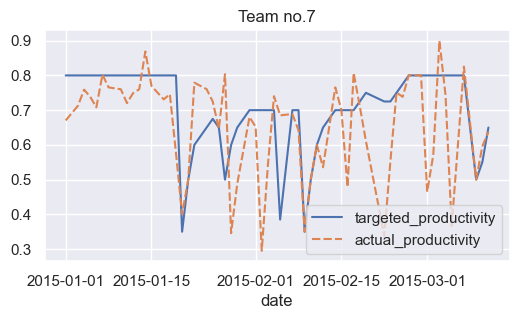

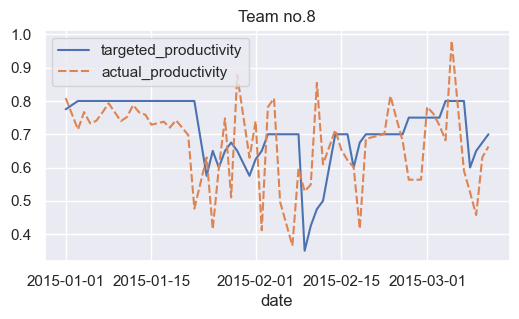

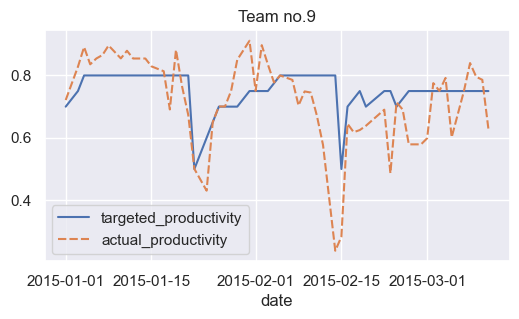

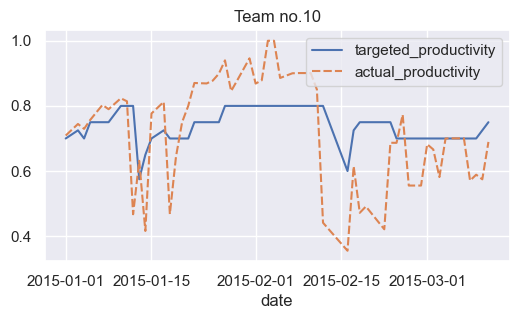

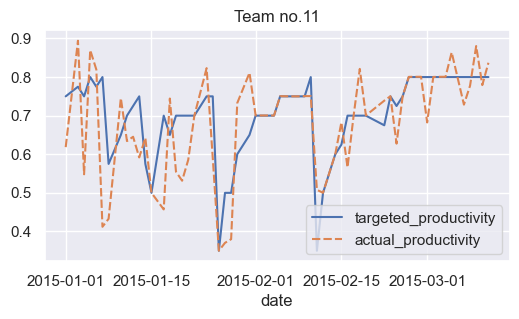

In [25]:
for n in range(1,12):
    sns.lineplot(df.loc[df['team']==n, ['targeted_productivity', 'actual_productivity']], errorbar=None).set(title=f'Team no.{n}')
    plt.show()

In [26]:
df['productivity_difference'] = df['targeted_productivity'] - df['actual_productivity']

In [27]:
results = []
for n in range(1,13):
    temp = []
    temp.append(df.loc[df['team']==n, 'productivity_difference'])
    results.append(np.mean(temp))

print('Team with the least performance: ', results.index(np.max(results))+1)
print('Team with the best performance: ', results.index(np.min(results))+1)

Team with the least performance:  7
Team with the best performance:  1


Further analysis to find out whether 'sewing' or 'finishing' part of the team has lower/higher performance to properly plan internal training is needed. To simplify the model for now, only basic split among the teams is considered.

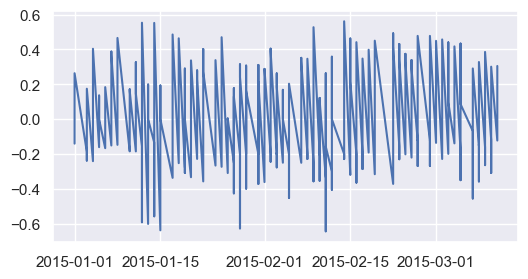

In [28]:
plt.plot(df['productivity_difference'])
plt.show()

In [29]:
outperformers = [x for x in results if x > 0]
for i in outperformers:
    print('This team outperforms targeted productivity: ',results.index(i)+1,' for this average value: ', results[results.index(i)])

This team outperforms targeted productivity:  6  for this average value:  0.04599774330851064
This team outperforms targeted productivity:  7  for this average value:  0.0462653276875
This team outperforms targeted productivity:  8  for this average value:  0.03410877413761469
This team outperforms targeted productivity:  9  for this average value:  0.023711163846153866
This team outperforms targeted productivity:  10  for this average value:  0.018763799849999995
This team outperforms targeted productivity:  11  for this average value:  0.02199270353409092


In [30]:
underperformers = [x for x in results if x < 0]
for i in underperformers:
    print('This team underperforms targeted productivity: ',results.index(i)+1,' for this average value: ', results[results.index(i)])

This team underperforms targeted productivity:  1  for this average value:  -0.07438771579999999
This team underperforms targeted productivity:  2  for this average value:  -0.030946871697247694
This team underperforms targeted productivity:  3  for this average value:  -0.0617745587473684
This team underperforms targeted productivity:  4  for this average value:  -0.052415777266666665
This team underperforms targeted productivity:  5  for this average value:  -0.024324876924731193
This team underperforms targeted productivity:  12  for this average value:  -0.004812982909090895


In [31]:
np.mean(df['productivity_difference'])

-0.00545868260985797

In general, the actual productivity is equal to targeted productivity, some teams outperform, some underpeform (see the split above). 

## feature: SMV

In [32]:
df['smv']

date
2015-01-01    26.16
2015-01-01     3.94
2015-01-01    11.41
2015-01-01    11.41
2015-01-01    25.90
              ...  
2015-03-11     2.90
2015-03-11     3.90
2015-03-11     3.90
2015-03-11     2.90
2015-03-11     2.90
Name: smv, Length: 1197, dtype: float64

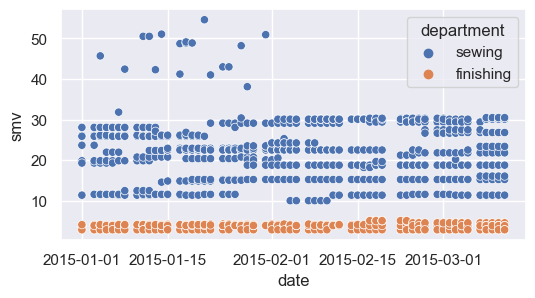

In [33]:
sns.scatterplot(data = df, x = df.index, y = 'smv', hue='department')
plt.show()

There are some outliers in the first half of time series, propably due to different product in production. No further analysis considered.

## feature: WIP

The only feature with NaN values, so let's have a look.

In [34]:
df['wip']

date
2015-01-01    1108.0
2015-01-01       NaN
2015-01-01     968.0
2015-01-01     968.0
2015-01-01    1170.0
               ...  
2015-03-11       NaN
2015-03-11       NaN
2015-03-11       NaN
2015-03-11       NaN
2015-03-11       NaN
Name: wip, Length: 1197, dtype: float64

In [35]:
df['wip'].isnull().value_counts()

False    691
True     506
Name: wip, dtype: int64

There are 691 non-null and 506 null values, let's see split between department, and among teams.

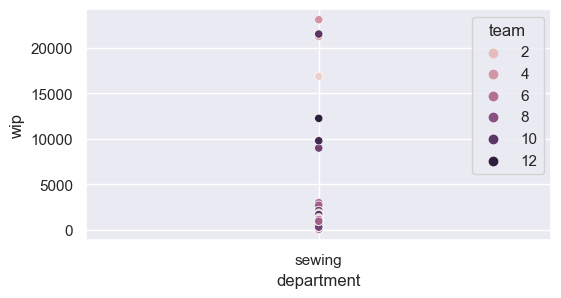

In [36]:
sns.scatterplot(data = df, x='department', y='wip', hue='team')
plt.show()

In [37]:
df.loc[df['department']=='finishing',['wip']].describe()

,wip
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


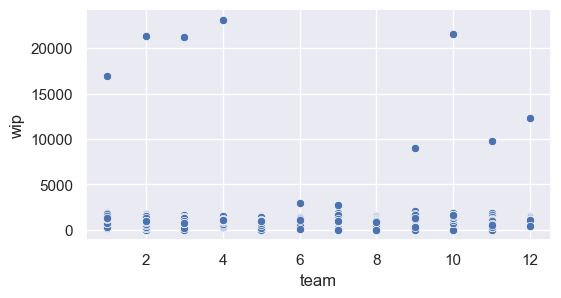

In [38]:
sns.scatterplot(data=df, x='team', y='wip')
plt.show()

WIP is related to department and no direct relationship to particular team is shown. So let's replace nan values at finishing dept. by 0. Further analysis of particular sewing/finishing team in relationship to wip possible.

In [39]:
df['wip'] = df['wip'].fillna(0)

In [40]:
df['wip'].isna().value_counts()

False    1197
Name: wip, dtype: int64

## feature: Overtime

In [41]:
df['over_time']

date
2015-01-01    7080
2015-01-01     960
2015-01-01    3660
2015-01-01    3660
2015-01-01    1920
              ... 
2015-03-11     960
2015-03-11     960
2015-03-11     960
2015-03-11    1800
2015-03-11     720
Name: over_time, Length: 1197, dtype: int64

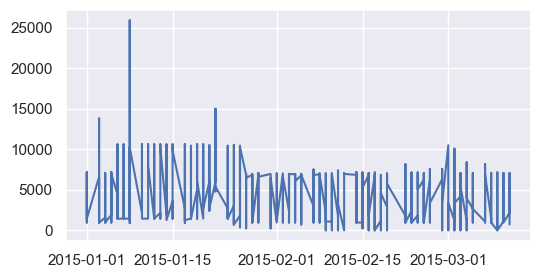

In [42]:
plt.plot(df['over_time'])
plt.show()

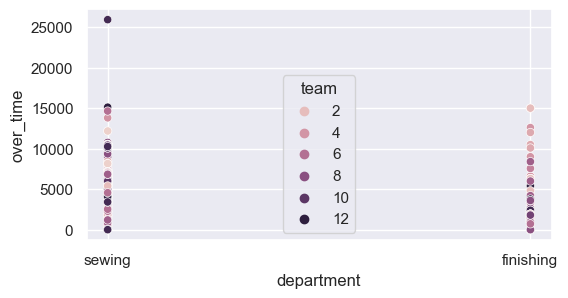

In [43]:
sns.scatterplot(data=df, x = 'department', y='over_time', hue = 'team')
plt.show()

## feature: Incentive

In [44]:
df['incentive']

date
2015-01-01    98
2015-01-01     0
2015-01-01    50
2015-01-01    50
2015-01-01    50
              ..
2015-03-11     0
2015-03-11     0
2015-03-11     0
2015-03-11     0
2015-03-11     0
Name: incentive, Length: 1197, dtype: int64

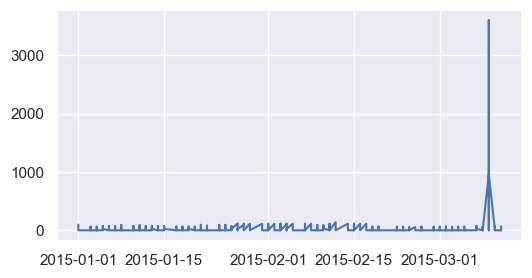

In [45]:
plt.plot(df['incentive'])
plt.show()

In [46]:
df['incentive'].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

In [47]:
df.loc[df['incentive']>50,['incentive','department']].value_counts().sort_index()

incentive  department
53         sewing         1
54         sewing         1
55         sewing         7
56         sewing        14
60         sewing        28
62         sewing         1
63         sewing        61
65         sewing         6
69         sewing         6
70         sewing         6
75         sewing        24
81         sewing         7
88         sewing        19
90         sewing         3
93         sewing         1
94         sewing         4
98         sewing         1
100        sewing         7
113        sewing        21
119        sewing         2
138        sewing         1
960        finishing      5
1080       finishing      1
1200       finishing      1
1440       finishing      1
2880       finishing      1
3600       finishing      1
dtype: int64

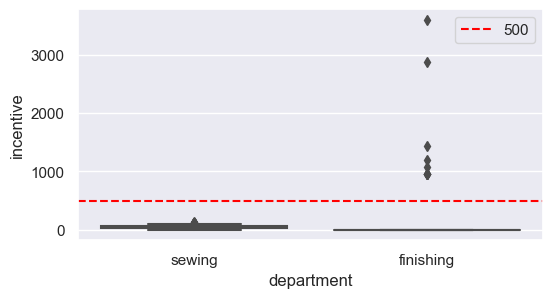

In [48]:
sns.boxplot(data = df, x='department', y = 'incentive')
plt.hlines(y=500, xmin = -0.5, xmax=1.5, color='red', linestyles = "--", label='500' )
plt.legend()
plt.show()

In [49]:
(df['incentive']>500).sum()

10

In [50]:
df.loc[df['incentive'] > 500].sort_values(by='incentive', ascending=False)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference
date,,,,,,,,,,,,,,,
2015-03-09,Quarter2,finishing,Monday,9,0.75,2.90,0.0,0,3600,0.0,0,0,15.0,0.841000,-0.091000
2015-03-09,Quarter2,finishing,Monday,5,0.60,3.94,0.0,0,2880,0.0,0,0,12.0,0.864343,-0.264343
2015-03-09,Quarter2,finishing,Monday,3,0.80,4.60,0.0,0,1440,0.0,0,0,12.0,0.795417,0.004583
2015-03-09,Quarter2,finishing,Monday,2,0.70,3.90,0.0,0,1200,0.0,0,0,10.0,0.682500,0.017500
2015-03-09,Quarter2,finishing,Monday,12,0.80,4.60,0.0,0,1080,0.0,0,0,9.0,0.902963,-0.102963
2015-03-09,Quarter2,finishing,Monday,11,0.80,2.90,0.0,0,960,0.0,0,0,8.0,0.960625,-0.160625
2015-03-09,Quarter2,finishing,Monday,4,0.75,3.94,0.0,0,960,0.0,0,0,8.0,0.795388,-0.045388
2015-03-09,Quarter2,finishing,Monday,1,0.75,3.94,0.0,0,960,0.0,0,0,8.0,0.794567,-0.044567
2015-03-09,Quarter2,finishing,Monday,10,0.70,2.90,0.0,0,960,0.0,0,0,8.0,0.477292,0.222708


In [51]:
df.loc[df.index == '2015-03-09'].sort_values(by='incentive', ascending=False)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference
date,,,,,,,,,,,,,,,
2015-03-09,Quarter2,finishing,Monday,9,0.75,2.90,0.0,0,3600,0.0,0,0,15.0,0.841000,-0.091000
2015-03-09,Quarter2,finishing,Monday,5,0.60,3.94,0.0,0,2880,0.0,0,0,12.0,0.864343,-0.264343
2015-03-09,Quarter2,finishing,Monday,3,0.80,4.60,0.0,0,1440,0.0,0,0,12.0,0.795417,0.004583
2015-03-09,Quarter2,finishing,Monday,2,0.70,3.90,0.0,0,1200,0.0,0,0,10.0,0.682500,0.017500
2015-03-09,Quarter2,finishing,Monday,12,0.80,4.60,0.0,0,1080,0.0,0,0,9.0,0.902963,-0.102963
2015-03-09,Quarter2,finishing,Monday,11,0.80,2.90,0.0,0,960,0.0,0,0,8.0,0.960625,-0.160625
2015-03-09,Quarter2,finishing,Monday,10,0.70,2.90,0.0,0,960,0.0,0,0,8.0,0.477292,0.222708
2015-03-09,Quarter2,finishing,Monday,4,0.75,3.94,0.0,0,960,0.0,0,0,8.0,0.795388,-0.045388
2015-03-09,Quarter2,finishing,Monday,1,0.75,3.94,0.0,0,960,0.0,0,0,8.0,0.794567,-0.044567


There is special incentive given to finishing dept., exactly and only on 09-03-2015, only to teams working that day. Overtime of sewing dept. vey high, but not for finishing dept. --> probably overtime paid by special incentive to finishing dept. If incentive to be part of prediction logarithm, better to delete these values (set not so big). The same for correlation analysis.

In [52]:
df = df.loc[df['incentive'] < 500]

<AxesSubplot:xlabel='department', ylabel='incentive'>

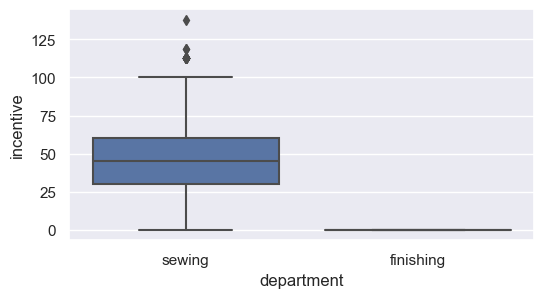

In [53]:
sns.boxplot(data=df, x= 'department' ,y = 'incentive')

## feature: Idle time

In [54]:
df['idle_time']

date
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
2015-01-01    0.0
             ... 
2015-03-11    0.0
2015-03-11    0.0
2015-03-11    0.0
2015-03-11    0.0
2015-03-11    0.0
Name: idle_time, Length: 1187, dtype: float64

In [55]:
df['idle_time'].describe()

count    1187.000000
mean        0.736310
std        12.763049
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       300.000000
Name: idle_time, dtype: float64

In [95]:
temp = df.loc[df['idle_time']<50]

## Features' correlation

In [56]:
df1 = df.iloc[:,0:14]

<AxesSubplot:>

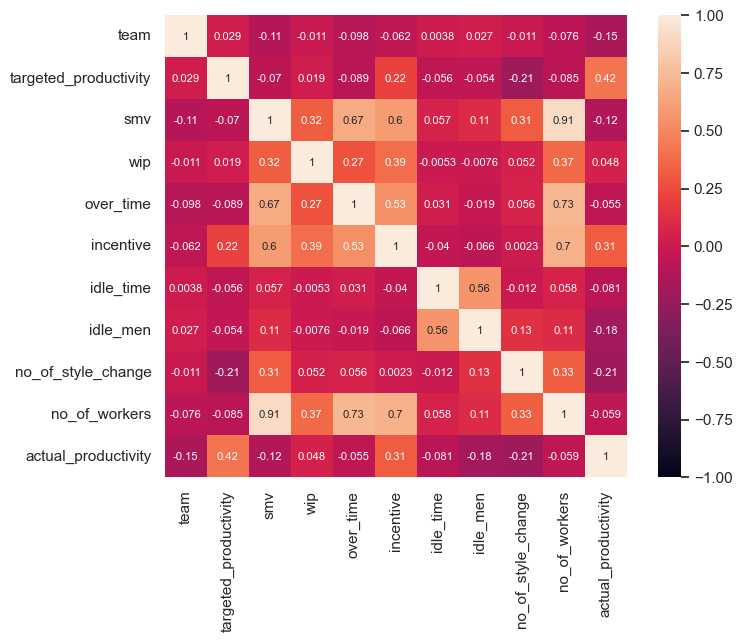

In [57]:
plt.figure(figsize = (8,6))
sns.heatmap(df1.corr(),
           annot=True,
           vmin= -1,
           vmax= 1,
           square = True,
           annot_kws={"size":8})

In [58]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference
date,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,-0.140725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,-0.136500
2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,-0.000570
2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,-0.000570
2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,-0.000382
